In [1]:
%run alg.py pipe a

[]


In [2]:
import matplotlib.pyplot as plt

from dataclasses import dataclass


@dataclass
class Measured:
    sizes: list
    times_avg: list
    times_full: list
    theoretical: list
    steps: list


def calculate_multiple(alg_num,  len_of_str_max, step_size=None, number_of_strings=1, chance_of_the_next_equal=0.25):
    sizes = []
    times_avg = []
    times_full = []
    theoretical = []
    steps = []
    if step_size is None:
        step_size = len_of_str_max

    for number in range(step_size, len_of_str_max+step_size, step_size):
        unsorted_sequences = generate_random_strings(
            length=number, number_of_strings=number_of_strings, chance_of_the_next_equal=chance_of_the_next_equal)
        times = []
        steps_single = []
        for seq in unsorted_sequences:
            t = Timer(Sort(seq))
            t.measureAlg(alg_num)
            s = t.sort
            steps_num = s.getSteps()
            if(steps_num == -1):
                print("Failed for: " + seq)
                continue
            times.append(t.getMilisec())
            steps_single.append(steps_num)

        sizes.append(number)
        average_time = sum(times)/len(times)
        times_full.append(times)
        times_avg.append(average_time)
        estimation = calculate_theoretical(alg_num, number)
        theoretical.append(estimation)
        steps.append(steps_single)
        print("Curr step: "+str(number))
    result = Measured(sizes, times_avg, times_full, theoretical, steps)
    return result


def draw_plots_(alg, sizes, times_avg, theoretical):
    fig, host = plt.subplots()
    plt.title("Measurements for algorithm: " + alg)
    par1 = host.twinx()
    host.set_xlabel("size")
    host.set_ylabel("time (ms)")
    par1.set_ylabel("estimated time")
    p1, = host.plot(sizes, times_avg, "b-")
    p2, = par1.plot(sizes, theoretical, "r-")
    host.set_ylim(0, times_avg[-1]*1.1)
    par1.set_ylim(0, theoretical[-1]*1.1)
    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)
    plt.show()


def draw_histogram(list_of_lists_with_results, labels=None):
    fig, axs = plt.subplots(
        1, len(list_of_lists_with_results), sharey=True, tight_layout=True)
    n_bins = 40
    if len(list_of_lists_with_results) == 1:
        axs.hist(list_of_lists_with_results[num], bins=n_bins)
    else:
        for num in range(len(list_of_lists_with_results)):
            axs[num].hist(list_of_lists_with_results[num], bins=n_bins)
            axs[num].set_title(labels[num])
    plt.show()


In [3]:
s = Sort("KKKKCC")
s.algBrutal()
s.getSteps()

1

In [3]:
#simple test
test = calculate_multiple(4, 25, number_of_strings=1)

Curr step: 25


In [18]:
a = calculate_multiple(1, 10000,step_size=500, number_of_strings=4)

Curr step: 500
Curr step: 1000
Curr step: 1500
Curr step: 2000
Curr step: 2500
Curr step: 3000
Curr step: 3500
Curr step: 4000
Curr step: 4500
Curr step: 5000
Curr step: 5500
Curr step: 6000
Curr step: 6500
Curr step: 7000
Curr step: 7500
Curr step: 8000
Curr step: 8500
Curr step: 9000
Curr step: 9500


In [19]:
draw_plots_("A compared to: O(n^2)",a.sizes, a.times_avg, a.theoretical)

In [ ]:
c = calculate_multiple(3, 10000,step_size=500, number_of_strings=4)

In [17]:
draw_plots_("C compared to: O(n^2)",c.sizes, c.times_avg, c.theoretical)

In [22]:
draw_plots_("C and a",c.sizes, c.times_avg, a.times_avg)

In [31]:
b = calculate_multiple(2, 15000,step_size=500, number_of_strings=50)

Curr step: 500
Curr step: 1000
Curr step: 1500
Curr step: 2000
Curr step: 2500
Curr step: 3000
Curr step: 3500
Curr step: 4000
Curr step: 4500
Curr step: 5000
Curr step: 5500
Curr step: 6000
Curr step: 6500
Curr step: 7000
Curr step: 7500
Curr step: 8000
Curr step: 8500
Curr step: 9000
Curr step: 9500
Curr step: 10000
Curr step: 10500
Curr step: 11000
Curr step: 11500
Curr step: 12000
Curr step: 12500
Curr step: 13000
Curr step: 13500
Curr step: 14000
Curr step: 14500


In [32]:
draw_plots_("B compared to: O(n)",b.sizes, b.times_avg, b.theoretical)

In [12]:
a_steps = calculate_multiple(1, 1000, number_of_strings=500)
c_steps = calculate_multiple(3, 1000, number_of_strings=500)
sum(c_steps.steps[0])/sum(a_steps.steps[0])

Curr step: 1000
Curr step: 1000


1.0582260250222468

Widać, że algorytm c podaje około 5% więcej kroków dla podobnych długości zadań

In [7]:
brutal = calculate_multiple(4,16,step_size=1,number_of_strings=30)

Curr step: 1
Curr step: 2
Curr step: 3
Curr step: 4
Curr step: 5
Curr step: 6
Curr step: 7
Curr step: 8
Curr step: 9
Curr step: 10
Curr step: 11
Failed for: KYYYKMYCKKCM
Failed for: KMMCKMYKYYKY
Failed for: KCYYKYKCKMCK
Failed for: KMMCMMYKKYKK
Failed for: KKKMCCKCYMMM
Failed for: YCKYYCCCKKYK
Curr step: 12
Failed for: KMMYYYKKYYKCC
Failed for: KKKYYMKYMKKYY
Failed for: MMMKCKYMYYKYK
Failed for: KKKKKYYYYCMCC
Failed for: MMKKKKCMYCCYM
Failed for: CYCCKKYKKKMMC
Curr step: 13
Failed for: KKKYCKCKMMYYYC
Failed for: YYYCCCCKKYYKMK
Failed for: KMMMKCYMCMKKKY
Failed for: KMKKKMYKKCCMKM
Failed for: KKKCYYYCYYKCMC
Failed for: KMMMYMKKMMCCKY
Failed for: CYCKMKKYCKMKKK
Failed for: YCCKMCCMMCKKKK
Failed for: YYYKMKKKYYYYYC
Failed for: KMKMMMKCCMCKCM
Failed for: MMKKKCCKMKYYYY
Failed for: KCCKMYYYMKMKCK
Failed for: MMMCCCMKKKKKKY
Failed for: KKCCKMYMMYMMKK
Failed for: KMKKKYMMKMMCKC
Failed for: YYYKCCKKYKYMMC
Failed for: YKYCCCKCKKMMCC
Failed for: KKCCCKMKCKYYMY
Failed for: YKKKYKKMYMMMYK
Curr ste

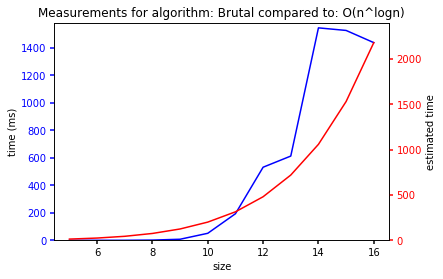

In [9]:
draw_plots_("Brutal compared to: O(n^logn)",brutal.sizes[4:], brutal.times_avg[4:], brutal.theoretical[4:])

# Badanie odchylenia standardowego czasów oraz kroków

Curr step: 2000
Curr step: 2000
Curr step: 2000


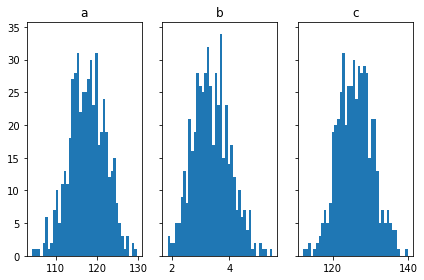

In [13]:
size_to_measure = 2000
a_many = calculate_multiple(1, size_to_measure, number_of_strings=500)
b_many = calculate_multiple(2, size_to_measure, number_of_strings=500)
c_many = calculate_multiple(3, size_to_measure, number_of_strings=500)
draw_histogram([a_many.times_full[0],b_many.times_full[0],c_many.times_full[0]],["a","b","c"])

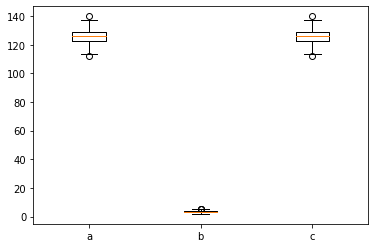

In [14]:
res = plt.boxplot([c_many.times_full[0],b_many.times_full[0],c_many.times_full[0]], labels=["a","b","c"])

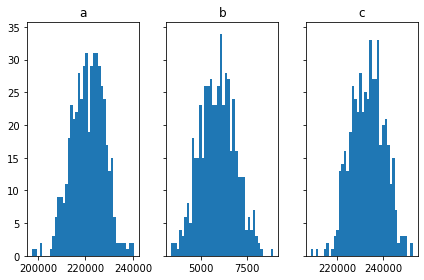

In [15]:
draw_histogram([a_many.steps[0],b_many.steps[0],c_many.steps[0]],["a","b","c"])

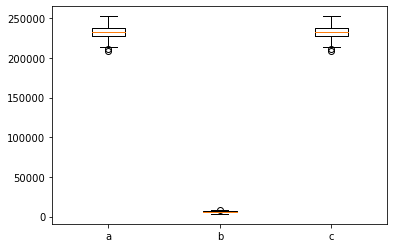

In [16]:
res = plt.boxplot([c_many.steps[0],b_many.steps[0],c_many.steps[0]], labels=["a","b","c"])

# Badanie ilości ułożonych podciągów w zadanym ciągu na czas i liczbę wymaganych kroków

In [29]:
measured_size = 2000
a_010 = calculate_multiple(1,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.10)
b_010 = calculate_multiple(2,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.10)
c_010 = calculate_multiple(3,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.10)
a_025 = calculate_multiple(1,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.25)
b_025 = calculate_multiple(2,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.25)
c_025 = calculate_multiple(3,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.25)
a_050 = calculate_multiple(1,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.50)
b_050 = calculate_multiple(2,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.50)
c_050 = calculate_multiple(3,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.50)
a_075 = calculate_multiple(1,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.75)
b_075 = calculate_multiple(2,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.75)
c_075 = calculate_multiple(3,  measured_size, number_of_strings=500, chance_of_the_next_equal=0.75)

Curr step: 2000
Curr step: 2000
Curr step: 2000
Curr step: 2000
Curr step: 2000
Curr step: 2000
Curr step: 2000
Curr step: 2000
Curr step: 2000
Curr step: 2000
Curr step: 2000
Curr step: 2000


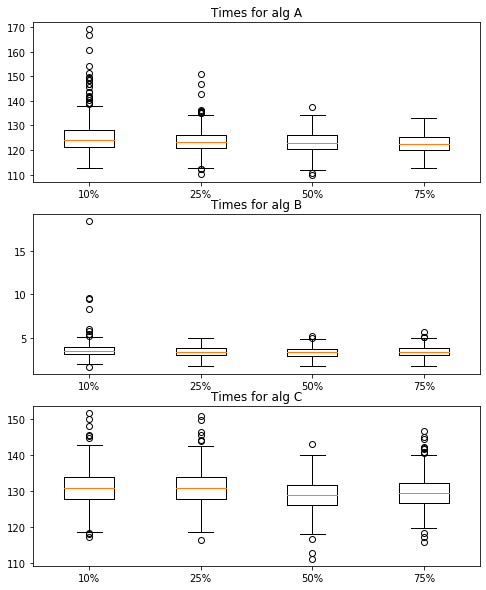

In [43]:
fig, ax = plt.subplots(3,1)
ax[0].set_title("Times for alg A")
ax[1].set_title("Times for alg B")
ax[2].set_title("Times for alg C")
r =ax[0].boxplot([a_010.times_full[0],a_025.times_full[0],a_050.times_full[0],a_075.times_full[0]], labels=["10%","25%","50%","75%"])
r =ax[1].boxplot([b_010.times_full[0],b_025.times_full[0],b_050.times_full[0],b_075.times_full[0]], labels=["10%","25%","50%","75%"])
r =ax[2].boxplot([c_010.times_full[0],c_025.times_full[0],c_050.times_full[0],c_075.times_full[0]], labels=["10%","25%","50%","75%"])
fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

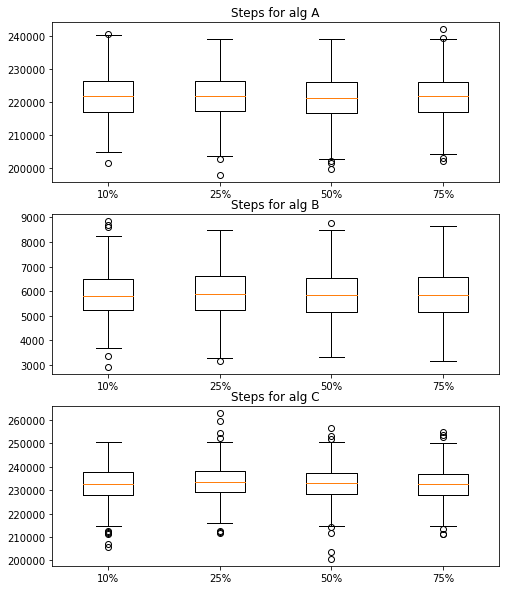

In [44]:
fig, ax = plt.subplots(3,1)
ax[0].set_title("Steps for alg A")
ax[1].set_title("Steps for alg B")
ax[2].set_title("Steps for alg C")
r =ax[0].boxplot([a_010.steps[0],a_025.steps[0],a_050.steps[0],a_075.steps[0]], labels=["10%","25%","50%","75%"])
r =ax[1].boxplot([b_010.steps[0],b_025.steps[0],b_050.steps[0],b_075.steps[0]], labels=["10%","25%","50%","75%"])
r =ax[2].boxplot([c_010.steps[0],c_025.steps[0],c_050.steps[0],c_075.steps[0]], labels=["10%","25%","50%","75%"])
fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()